In [1]:
%cd ..

/mnt/c/Users/maxli/OneDrive - Van Oord/Documents/thesis/code


In [43]:
import rasterio as rio
import numpy as np
import geopandas as gpd

In [18]:
validation = rio.open('../data/raster_reproj_figures/validation_data.tif')
validation_array = validation.read()
validation_array.shape

(1, 928, 1174)

In [19]:
bi = rio.open('../data/raster_reproj_figures/bilinear.tif')
bi_arrays = bi.read()
bi_arrays.shape

(1, 18, 22)

In [39]:
bi_consecutive = np.arange(1,len(bi_arrays.flatten())+1).reshape(bi_arrays.shape)
validation_consecutive_array = np.arange(1,len(validation_array.flatten())+1).reshape(validation_array.shape)

In [41]:
with rio.open('../data/raster_reproj_figures/valid_consec.tif',**validation.meta,mode='w') as valid_consec:
    valid_consec.write(validation_consecutive_array)

In [42]:
with rio.open('../data/raster_reproj_figures/bi_consec.tif',**bi.meta,mode='w') as bi_consec:
    bi_consec.write(bi_consecutive)

In [60]:
bi_vector = gpd.read_file('../data/raster_reproj_figures/bi_vector.gpkg')
valid_vector = gpd.read_file('../data/raster_reproj_figures/consec_smaller_subset_vector.gpkg').to_crs(bi_vector.crs)
bounds = valid_vector.to_crs(bi_vector.crs).geometry.total_bounds
bi_vector = bi_vector.clip(bounds)

<AxesSubplot:>

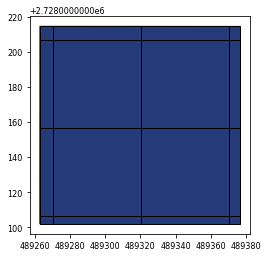

In [66]:
ax = valid_vector.plot(edgecolor='red',color='white')
bi_vector.plot(edgecolor='black',color='white',ax=ax)
